In [1]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
# import imutils
import qrcode
from pyzbar.pyzbar import decode
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook


output_notebook()


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
    
def create_win(frames, scale=1.0) :    
    global myImage
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    fr=cv2.flip(fr, -1) # because Bokeh flips vertically
    width=fr.shape[1]
    height=fr.shape[0]    

    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=int(width*scale), height=int(height*scale))    
    myImage = p.image_rgba(image=[fr], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)   
    
    
def update_win(frames) :
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    fr=cv2.flip(fr, -1)
    myImage.data_source.data['image']=[fr]
    push_notebook()
    time.sleep(0.05)

Loading BokehJS ...

### *cv2.cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) → dst*
Parameters:	
- **src** : 입력 이미지로써 단일 채널 이미지(Grayscale)여야 하며 데이터 타입은 float32
- **blockSize** :  Corner 검출을 위한 알고리즘 수행 중 검사할 이웃 픽셀의 크기
- **ksize** : 내부적으로 적용할 Sobel 필터링에 대한 인자(Apeture Parameter)-> Sobel 미분에 사용될 인자값
- **k** : Harris detector free parameter. (Det() - k Tr())  보통 0.04~ 0.06 으로 함

float32


([array([  0.,   0.,   7., 593.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   4., 587.,   9.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   1., 590.,   8.,   1.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   3., 588.,   5.,   2.,   1.,   1.,   0.,   0.]),
  array([  0.,   0.,   3., 586.,   7.,   1.,   3.,   0.,   0.,   0.]),
  array([  0.,   0.,   4., 586.,  10.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   4., 591.,   5.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   3., 588.,   9.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   4., 582.,  11.,   3.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   2., 575.,  22.,   1.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0., 569.,  27.,   4.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0., 585.,  15.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   1., 574.,  22.,   3.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0., 571.,  27.,   2.,   0.,   0.,   0.,   0.]),
  arra

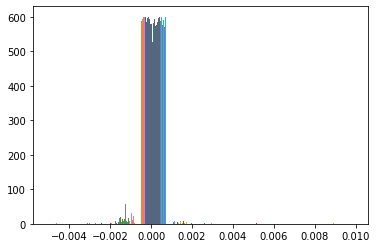

In [2]:
src = cv2.imread("building.jpg", cv2.IMREAD_GRAYSCALE)

# block 크기, 소벨크기, k = 0.04 ~ 0.06,  R = Det() - kTr()
harris = cv2.cornerHarris(src, 3, 3, 0.04)
print(harris.dtype)

plt.hist(harris)

uint8


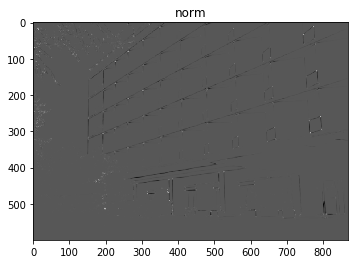

In [3]:
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
print(harris_norm.dtype)
imshow("norm", harris_norm)

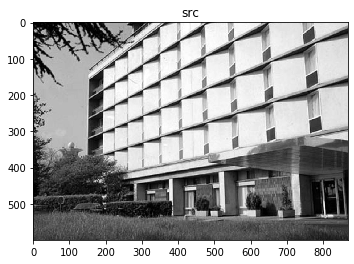

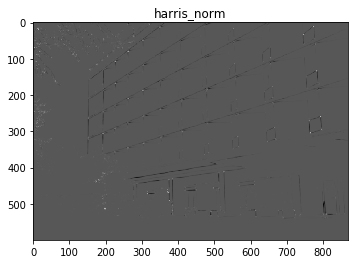

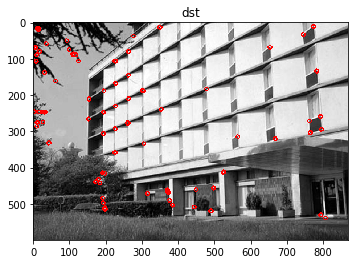

In [4]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 128:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

# imshow('src & harris_norm & dst', np.hstack([src, harris_norm, dst]))  ---> 왜 안되지...
imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

float32


([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 490.]),
  arra

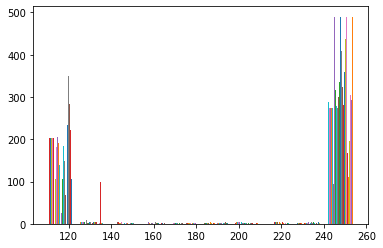

In [5]:
corner = cv2.imread("corner.png", cv2.IMREAD_GRAYSCALE)

# block 크기, 소벨크기, k = 0.04 ~ 0.06,  R = Det() - kTr()
corner_harris = cv2.cornerHarris(corner, 3, 3, 0.04)
print(corner_harris.dtype)

plt.hist(corner)

uint8


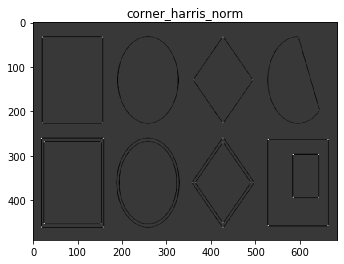

In [6]:
corner_harris_norm = cv2.normalize(corner_harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
print(corner_harris_norm.dtype)
imshow("corner_harris_norm", corner_harris_norm)

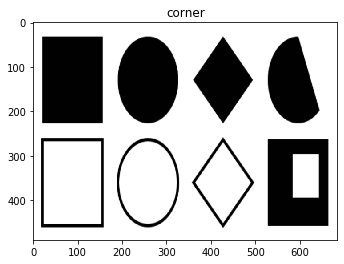

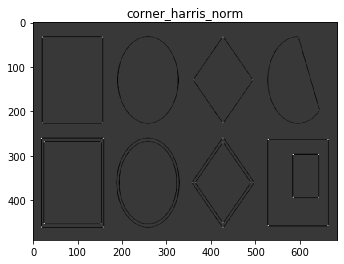

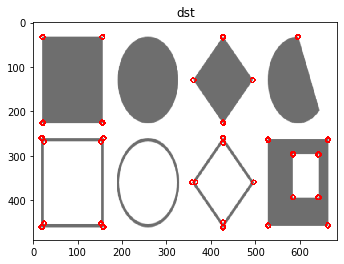

In [7]:
corner_dst = cv2.cvtColor(corner, cv2.COLOR_GRAY2BGR)

for y in range(corner_harris_norm.shape[0]):
        for x in range(corner_harris_norm.shape[1]):
            if corner_harris_norm[y, x] > 90:
                    cv2.circle(corner_dst, (x, y), 5, (0, 0, 255), 2)

# imshow('src & harris_norm & dst', np.hstack([src, harris_norm, dst]))
imshow('corner', corner)
imshow('corner_harris_norm', corner_harris_norm)
imshow('dst', corner_dst)

float32


([array([  0.,   0.,   0.,   0., 105., 375.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0., 105., 375.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  92., 388.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  84., 396.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  88., 392.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  85., 395.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  78., 402.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  77., 403.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  74., 406.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  72., 408.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  66., 414.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  59., 421.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  44., 436.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  37., 443.,   0.,   0.,   0.,   0.]),
  arra

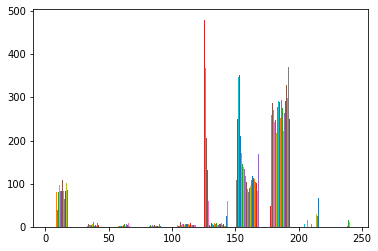

In [8]:
chessBoard = cv2.imread("chessBoard.jpg", cv2.IMREAD_GRAYSCALE)
chessBoard_blur = cv2.GaussianBlur(chessBoard, (15,15), 0)

# block 크기, 소벨크기, k = 0.04 ~ 0.06,  R = Det() - kTr()
chessBoard_harris = cv2.cornerHarris(chessBoard, 3, 3, 0.04)
chessBoard_blur_harris = cv2.cornerHarris(chessBoard_blur, 3, 3, 0.04)

print(chessBoard_harris.dtype)
# print(chessBoard_harris.dtype)

plt.hist(chessBoard)
# plt.hist(chessBoard_blur)

uint8


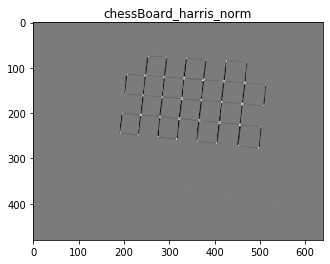

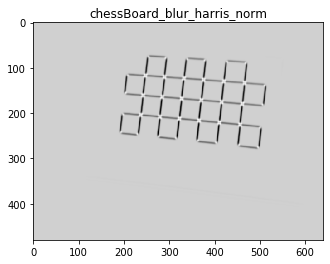

In [9]:
chessBoard_harris_norm = cv2.normalize(chessBoard_harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
chessBoard_blur_harris_norm = cv2.normalize(chessBoard_blur_harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

print(chessBoard_harris_norm.dtype)

imshow("chessBoard_harris_norm", chessBoard_harris_norm)
imshow("chessBoard_blur_harris_norm", chessBoard_blur_harris_norm)

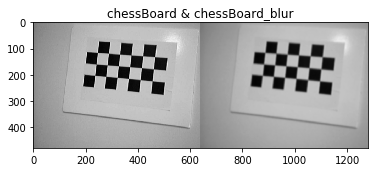

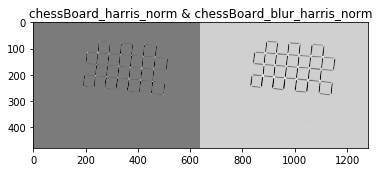

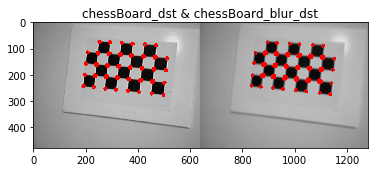

In [10]:
chessBoard_dst = cv2.cvtColor(chessBoard, cv2.COLOR_GRAY2BGR)
chessBoard_blur_dst = cv2.cvtColor(chessBoard_blur, cv2.COLOR_GRAY2BGR)


for y in range(chessBoard_harris_norm.shape[0]):
        for x in range(chessBoard_harris_norm.shape[1]):
            if chessBoard_harris_norm[y, x] > 128:
                    cv2.circle(chessBoard_dst, (x, y), 5, (0, 0, 255), 2)

for y in range(chessBoard_blur_harris_norm.shape[0]):
        for x in range(chessBoard_blur_harris_norm.shape[1]):
            if chessBoard_blur_harris_norm[y, x] > 220:    ## blur때문에 밝아져서 값을 높여줘야함
                    cv2.circle(chessBoard_blur_dst, (x, y), 5, (0, 0, 255), 2)
                    
                    
                    
                    
# imshow('src & harris_norm & dst', np.hstack([src, harris_norm, dst]))
imshow('chessBoard & chessBoard_blur', np.hstack([chessBoard, chessBoard_blur]))
imshow('chessBoard_harris_norm & chessBoard_blur_harris_norm', np.hstack([chessBoard_harris_norm, chessBoard_blur_harris_norm]))
imshow('chessBoard_dst & chessBoard_blur_dst', np.hstack([chessBoard_dst, chessBoard_blur_dst]))

---

### 다른 방법
위의 코딩은 for문 때문에 시간이 너무 많이 잡아 먹음....

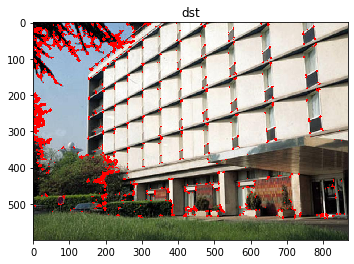

In [11]:
src = cv2.imread("building.jpg")
gray = cv2.imread("building.jpg", 0)
dst = cv2.cornerHarris(gray, 5, 3, 0.04)

src[dst>0.01*dst.max()] = [0, 0, 255]
imshow('dst', src)

In [12]:
a = np.array([[1, 2, 4], [7, 0, 1]])
print(a)

b = a > 3
print(b)

a[b] = 100
print(a)

[[1 2 4]
 [7 0 1]]
[[False False  True]
 [ True False False]]
[[  1   2 100]
 [100   0   1]]


---


92
(254.0, 75.0)


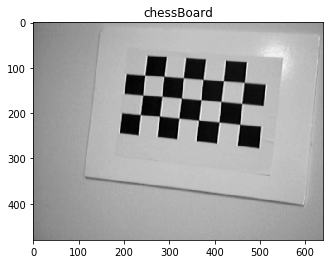

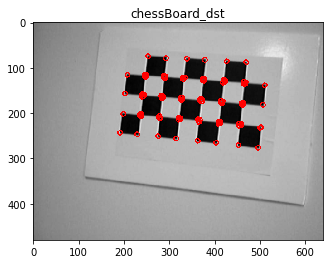

True

In [13]:
chessBoard = cv2.imread('chessBoard.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)

chessBoard_fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출됌, 원에서도 검출되지만 중첨되서 검출될수 있음.
keypoints = chessBoard_fast.detect(chessBoard)
print(len(keypoints))

print(keypoints[0].pt)
x = keypoints[0].pt[0]
y = keypoints[0].pt[1]

x, y = x = keypoints[0].pt


chessBoard_dst = cv2.cvtColor(chessBoard, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))   # pt는 무조건 integer값으로 줘야함
        cv2.circle(chessBoard_dst, pt, 5, (0, 0, 255), 2)

imshow('chessBoard', chessBoard)
imshow('chessBoard_dst', chessBoard_dst)

cv2.imwrite("out.png", chessBoard_dst)

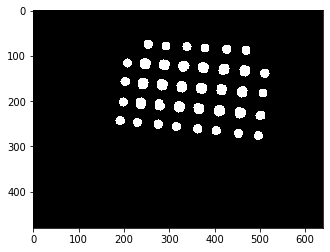

In [22]:
mask = np.zeros(chessBoard.shape, dtype = 'uint8')  # 반드시 mask는 uint8로 dtype을 바꿔줘야함

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))   # pt는 무조건 integer값으로 줘야함
        cv2.circle(mask, pt, 10, (255,255, 255), -1)
        
imshow("", mask)

38


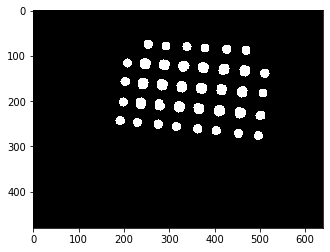

In [25]:
## 위에꺼랑 무슨 차이인지 모르겠음....

contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

chessBoard = cv2.imread('chessboard.jpg')
points = []
for con in contours:
    M = cv2.moments(con, True)
#     print(M)
    cx = int(M['m10']/M['m00'])   # m00 -> 면적 = 점 갯수 / m10 --> x축 합계
    cy = int(M['m01']/M['m00'])   # m01 --> y축 합계
    cv2.circle(chessBoard_dst, (cx, cy), 4, (0,0,255), -1)
    points.append([cx,cy])
imshow("", mask)


35
(21.0, 33.0)


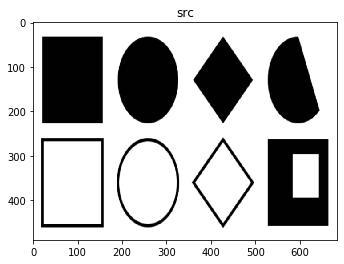

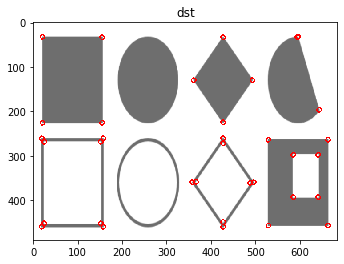

In [33]:
corner = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출됌, 원에서도 검출되지만 중첨되서 검출될수 있음.
keypoints = fast.detect(corner)
print(len(keypoints))

print(keypoints[0].pt)
x = keypoints[0].pt[0]
y = keypoints[0].pt[1]

x, y  = keypoints[0].pt


corner_dst = cv2.cvtColor(corner, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))   # pt는 무조건 integer값으로 줘야함
        cv2.circle(corner_dst, pt, 5, (0, 0, 255), 2)

imshow('src', corner)
imshow('dst', corner_dst)

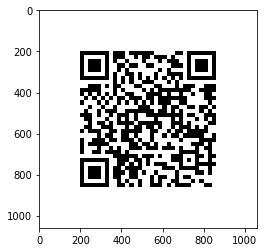

In [40]:
acronet = cv2.imread('acronet.png')
gray = cv2.imread('acronet.png', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)
keypoints = fast.detect(gray)


acronet_dst = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1]))
    cv2.circle(acronet, pt, 5, (0,0,255), 2)
    
imshow("", acronet)



# corner = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)
# #src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)

# corner_fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출됌, 원에서도 검출되지만 중첨되서 검출될수 있음.
# keypoints = fast.detect(corner)
# print(len(keypoints))

# print(keypoints[0].pt)
# x = keypoints[0].pt[0]
# y = keypoints[0].pt[1]

# x, y = keypoints[0].pt


# corner_dst = cv2.cvtColor(corner, cv2.COLOR_GRAY2BGR)

# for kp in keypoints:
#         pt = (int(kp.pt[0]), int(kp.pt[1]))   # pt는 무조건 integer값으로 줘야함
#         cv2.circle(corner_dst, pt, 5, (0, 0, 255), 2)

# imshow('src', corner)
# imshow('dst', corner_dst)

---

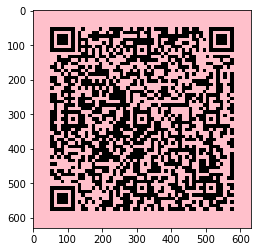

In [28]:
qr = qrcode.QRCode(version = 2,
     error_correction = qrcode.constants.ERROR_CORRECT_H,
     box_size = 10,
     border = 5)

url = 'https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=%EC%98%A4%EB%8A%98+%EB%82%A0%EC%94%A8'
qr.add_data(url)
qr.make()

img = qr.make_image(fill_color="black", back_color="pink")

plt.imshow(img, cmap="gray")

img.save("qrcode.png")



https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=%EC%98%A4%EB%8A%98+%EB%82%A0%EC%94%A8


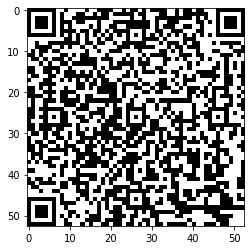

In [29]:
img = cv2.imread("qrcode.png")
# img3 = np.hstack([img, img, img])
# cv2.imwrite("3.png", img3)
# imshow("", img3)

qrDecoder = cv2.QRCodeDetector()
data, bbox, rectifiedImage = qrDecoder.detectAndDecode(img)

print(data)

imshow("", rectifiedImage)

https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=%EC%98%A4%EB%8A%98+%EB%82%A0%EC%94%A8


AttributeError: 'NoneType' object has no attribute 'shape'

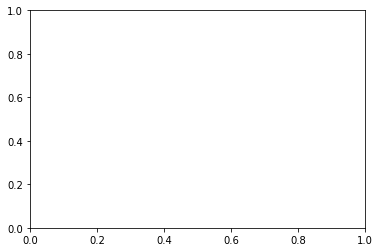

In [30]:
# qrcode 살짝 수정해서 qrcode2로 만들어봄
img2 = cv2.imread("qrcode2.png")

qrDecoder = cv2.QRCodeDetector()
data2, bbox2, rectifiedImage2 = qrDecoder.detectAndDecode(img2)

print(data)

imshow("", rectifiedImage2)

# 결과가 에러 난 이유는 이미지 일부를 훼손해서

[Decoded(data=b'http://www.acronet.kr/24987', type='QRCODE', rect=Rect(left=201, top=201, width=658, height=658), polygon=[Point(x=201, y=201), Point(x=201, y=859), Point(x=859, y=859), Point(x=859, y=201)])]


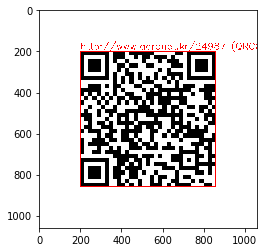

In [31]:
from pyzbar.pyzbar import decode

image = cv2.imread('acronet.png')
#image = cv2.GaussianBlur(image, (51,51), 0)  어디까지 가능한지 테스트
#image = cv2.imread('barqr.jpg')
code = decode(image)
print(code)

for barcode in code:
    (x, y, w, h) = barcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType)
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
        1.5, (0, 0, 255), 2) 
imshow("", image)

[Decoded(data=b'http://pyimg.co/dl4cv', type='QRCODE', rect=Rect(left=331, top=225, width=103, height=103), polygon=[Point(x=331, y=225), Point(x=331, y=327), Point(x=434, y=328), Point(x=433, y=225)]), Decoded(data=b'https://www.pyimagesearch.com/', type='QRCODE', rect=Rect(left=89, top=66, width=119, height=120), polygon=[Point(x=89, y=66), Point(x=89, y=185), Point(x=208, y=186), Point(x=207, y=66)]), Decoded(data=b'https://openmv.io/', type='QRCODE', rect=Rect(left=441, top=70, width=122, height=122), polygon=[Point(x=441, y=71), Point(x=441, y=191), Point(x=563, y=192), Point(x=562, y=70)]), Decoded(data=b'0100000000020183', type='DATABAR', rect=Rect(left=292, top=786, width=181, height=94), polygon=[Point(x=292, y=787), Point(x=292, y=879), Point(x=473, y=880), Point(x=473, y=786)]), Decoded(data=b'DL4CV', type='CODE39', rect=Rect(left=294, top=632, width=177, height=98), polygon=[Point(x=294, y=633), Point(x=294, y=729), Point(x=471, y=730), Point(x=471, y=632)]), Decoded(data=b

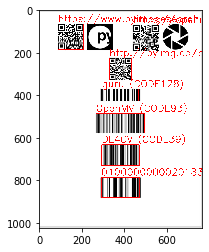

In [32]:
image = cv2.imread('barqr.jpg')
#image = cv2.GaussianBlur(image, (51,51), 0)  어디까지 가능한지 테스트
#image = cv2.imread('barqr.jpg')
code = decode(image)
print(code)

for barcode in code:
    (x, y, w, h) = barcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType)
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
        1.5, (0, 0, 255), 2) 
imshow("", image)

---

여기서부터 gg...

len(keypoints): 187
desc.shape: (187, 32)


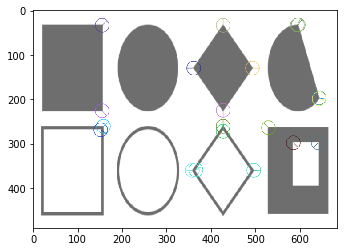

In [44]:
#src = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)
src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create()
keypoints = orb.detect(src)
keypoints, desc = orb.compute(src, keypoints)


print('len(keypoints):', len(keypoints))
print('desc.shape:', desc.shape)


keypoints = keypoints[0:20]
dst = cv2.drawKeypoints(src, keypoints, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst)

len(keypoints): 500
desc.shape: (500, 32)


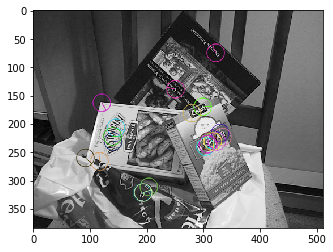

[ 93  89 127 161 134  90 182 224 108  96 119 162  95  30 163  41  51 213
 164 243  85 181  45 110 254 167  99  71 229  59  45  71]


In [46]:
src = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)
# src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create()
keypoints = orb.detect(src)
keypoints, desc = orb.compute(src, keypoints)


print('len(keypoints):', len(keypoints))
print('desc.shape:', desc.shape)


keypoints = keypoints[0:20]
dst = cv2.drawKeypoints(src, keypoints, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst)
print(desc[0])

---

desc1.shape: (453, 32)
desc2.shape: (500, 32)


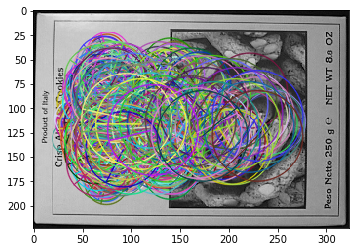

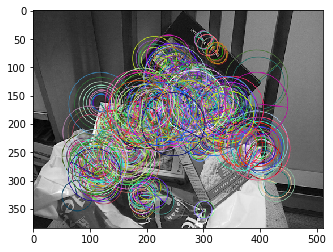

In [51]:
src1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)

# src1 = cv2.imread('book3.jpg', cv2.IMREAD_GRAYSCALE)
# src2 = cv2.imread('book3_1.jpg', cv2.IMREAD_GRAYSCALE)


orb = cv2.ORB_create()
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

print('desc1.shape:', desc1.shape)  # desc1.shape: (453, 32)  --> keypoint가 453개 나옴
print('desc2.shape:', desc2.shape)  # desc2.shape: (500, 32)  --> keypoint가 500개 나옴

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst1)
plt.show()
imshow("", dst2)
plt.show()

In [58]:
print(keypoints1[171].pt)
print(desc1[171])

print(keypoints2[171].pt)
print(desc2[171])

(56.400001525878906, 134.40000915527344)
[103 153 226  94 193 208  86 176 121  66 254  18 106 254  46 116  93 250
 182 194 221  47 246 227  19  62 144  75 127 173 248  70]
(121.20000457763672, 297.6000061035156)
[169  30  14  49 184 251 145 119 188 239 246 253 159   6 130 153 206  34
 206  52 189 207  97  12 236 195 122 209 202  76 175 217]


In [70]:
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

print(len(matches)) # --> 매칭 되는 것이 453개라는 뜻

print(matches[0].queryIdx) # --> 첫번째 매칭되는 것에 대한 정보를 담고 있음
print(matches[0].trainIdx) # 두번째 이미지
print(matches[0]. distance) # Hamming distance를 의미

print(keypoints1[matches[0].queryIdx].pt)  # 첫번째 이미지의 물리적인 좌표
print(keypoints2[matches[0].trainIdx].pt)  # 두번째 이미지의 물리적인 좌표

for m in matches:
    print(f"{m.queryIdx - m.trainIdx  / m.distance  }")
    


453
0
487
86.0
(83.0, 78.0)
(343.9854736328125, 186.32545471191406)
-5.662790697674419
-3.1643835616438354
-2.909090909090909
-0.7471264367816093
2.4634146341463414
0.8701298701298699
5.2073170731707314
5.636363636363637
1.506849315068493
7.7368421052631575
7.987654320987654
4.578947368421052
5.9324324324324325
10.986486486486486
13.75
9.573170731707318
14.588235294117647
13.647887323943662
16.848837209302324
16.614285714285714
16.121951219512194
17.797619047619047
17.243243243243242
16.87142857142857
23.160493827160494
20.595238095238095
25.05263157894737
26.151898734177216
22.28787878787879
25.63855421686747
23.375
25.826666666666668
30.821428571428573
26.430555555555557
30.91025641025641
28.057142857142857
32.0253164556962
31.166666666666668
35.943661971830984
34.7037037037037
37.220588235294116
32.916666666666664
38.45679012345679
35.892307692307696
42.734939759036145
38.43421052631579
42.642857142857146
44.67088607594937
44.951219512195124
48.130434782608695
47.328947368421055
49.

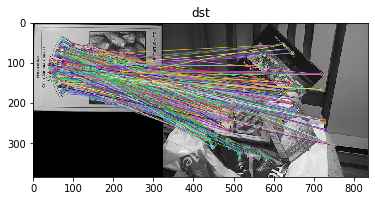

True

In [71]:
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, matches, None)

imshow('dst', dst)
cv2.imwrite("orb.png", dst)

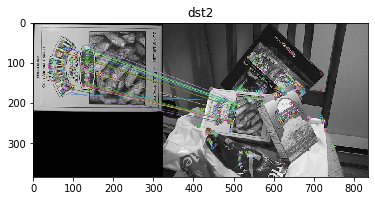

True

In [77]:
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[0:20]

dst2 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

imshow('dst2', dst2)

cv2.imwrite("orb2.png", dst2)

---


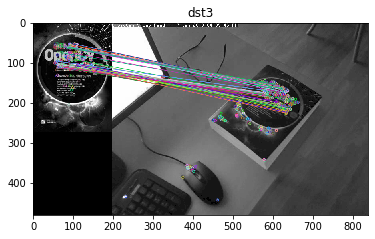

True

In [87]:
src3 = cv2.imread('book3.jpg', cv2.IMREAD_GRAYSCALE)
src4 = cv2.imread('book3_1.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()
keypoints3, desc3 = orb.detectAndCompute(src3, None)
keypoints4, desc4 = orb.detectAndCompute(src4, None)

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc3, desc4)

matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[0:50]

dst3 = cv2.drawMatches(src3, keypoints3, src4, keypoints4, good_matches, None)

imshow('dst3', dst3)

cv2.imwrite("orb3.png", dst3)

## 파노라마 만들기

In [ ]:
files = ["img1.jpg", "img2.jpg", "img3.jpg"]
# files = ['left.jpeg', 'right.jpeg']

imgs = []
for file in files:
    img = cv2.imread(file)
    imgs.append(img)
    
stitcher = cv2.Stitcher_create()
status, dst = stitcher.stitch(imgs)
cv2.imwrite("result.jpg", dst)
imshow('dst', dst)